In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [44]:
interim = pathlib.Path().cwd().parent.parent / 'data' / 'interim'

In [91]:
inc = pd.read_csv(interim / 'inc.csv', index_col=0)
inc_sex = pd.read_csv(interim / 'inc_sex.csv', index_col=0)
inc_adult = pd.read_csv(interim / 'inc_adult.csv', index_col=0)
inc_adh_cumsum = pd.read_csv(interim / 'inc_adh_cumsum.csv', index_col=0)
inc_adh_rollmean = pd.read_csv(interim / 'inc_adh_rollmean.csv', index_col=0)

In [ ]:
inc_adh_rollmean.date_report = pd.to_datetime(inc_adh_rollmean.date_report)

In [112]:
# inc_adh_rollmean[inc_adh_rollmean.addr_dist_home == 'QA01']
# inc_adh_rollmean.info()
# inc_adh_cumsum[inc_adh_cumsum.addr_dist_home == 'QA08']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1249
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_report     1250 non-null   datetime64[ns]
 1   addr_dist_home  1250 non-null   object        
 2   case            1250 non-null   int64         
 3   case_rm         1100 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 81.1+ KB


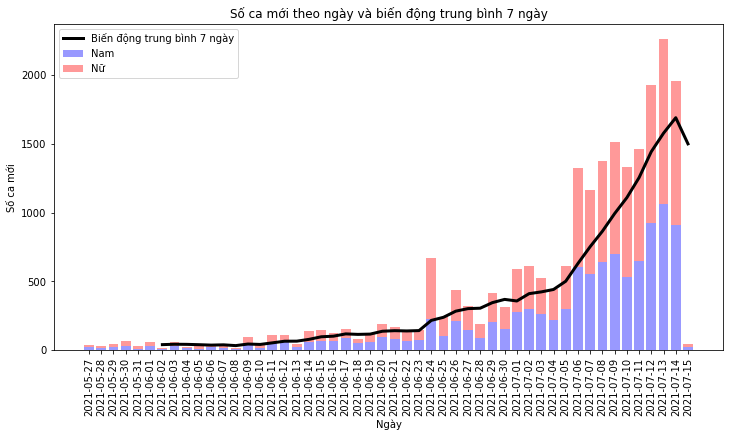

In [181]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i] + 100, y[i], ha='center', va='top')
        
fig, ax = plt.subplots(figsize=(12,6))
# ax.bar(inc.index, inc.case, label='Số ca mới theo ngày', linewidth=3, color='gray')
ax.bar(inc_sex.index, inc_sex.male, label='Nam', color='blue', alpha=0.4)
ax.bar(inc_sex.index, inc_sex.female, bottom=inc_sex.male, label='Nữ', color='red', alpha=0.4)
ax.plot(inc.index, inc.case_rm, label='Biến động trung bình 7 ngày', linewidth=3, color='black')
# ax.plot(inc_sex.index, inc_sex.male, label='Nam', linewidth=2, color='blue')
# ax.plot(inc_sex.index, inc_sex.female, label='Nữ', linewidth=2, color='red')
ax.set_ylabel('Số ca mới')
ax.set_xlabel('Ngày')
ax.set_xticks(inc.index)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Số ca mới theo ngày và biến động trung bình 7 ngày')
ax.legend()
# addlabels(inc.index, inc.case)

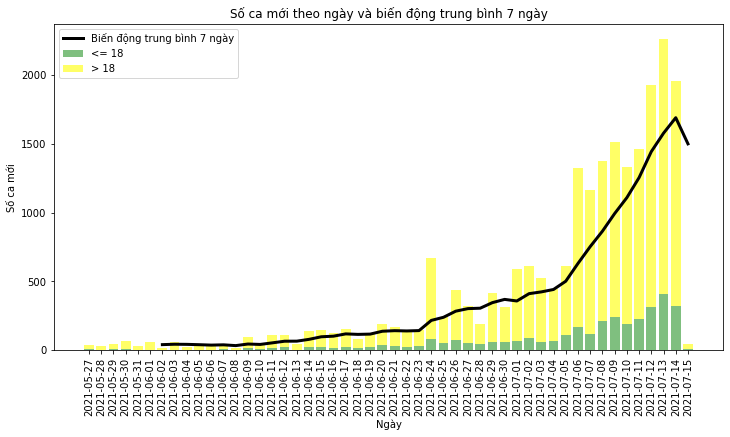

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
# ax.bar(inc.index, inc.case, label='Số ca mới theo ngày', linewidth=3, color='gray')
ax.bar(inc_sex.index, inc_adult.lte18, label='<= 18', color='green', alpha=0.5)
ax.bar(inc_sex.index, inc_adult.gt18, bottom=inc_adult.lte18, label='> 18', color='yellow', alpha=0.6)
ax.plot(inc.index, inc.case_rm, label='Biến động trung bình 7 ngày', linewidth=3, color='black')
# ax.plot(inc_sex.index, inc_sex.male, label='Nam', linewidth=2, color='blue')
# ax.plot(inc_sex.index, inc_sex.female, label='Nữ', linewidth=2, color='red')
ax.set_ylabel('Số ca mới')
ax.set_xlabel('Ngày')
ax.set_xticks(inc.index)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Số ca mới theo ngày và biến động trung bình 7 ngày')
ax.legend()

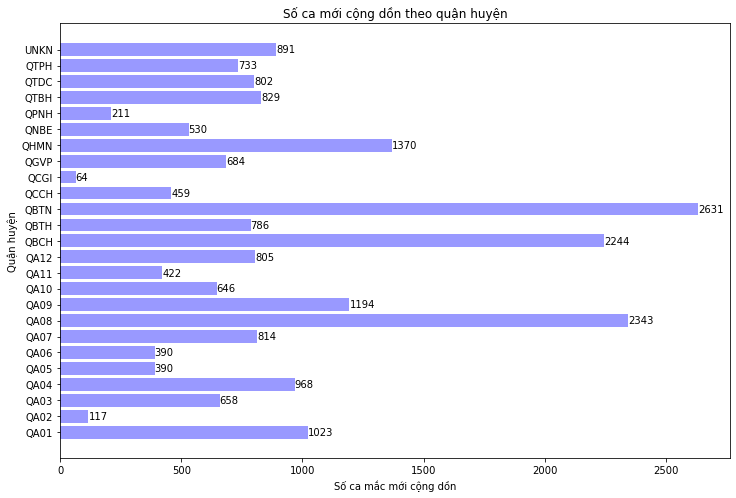

In [169]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y[i], i, y[i], ha='left', va='center')
        
inc_adh_cumsum = inc_adh_cumsum[inc_adh_cumsum.date_report == '2021-07-15']
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(inc_adh_cumsum.addr_dist_home, inc_adh_cumsum.case_cumsum, color='blue', alpha=0.4)
ax.set_ylabel('Quận huyện')
ax.set_xlabel('Số ca mắc mới cộng dồn')
ax.set_title('Số ca mới cộng dồn theo quận huyện')

addlabels(inc_adh_cumsum.addr_dist_home, inc_adh_cumsum.case_cumsum.to_numpy())

1023

In [129]:
def plot_inc_adh_rollmean(df, addr_dist):
    n = len(addr_dist)
    fig, ax = plt.subplots(1, n, figsize=(18, 4))
    fig.tight_layout()
    for i in range(n):
        data = (
                df[inc_adh_rollmean.addr_dist_home == addr_dist[i]]
                .set_index('date_report')
                .loc['2021-06-15':,:]
               )
        ax[i].bar(data.index, data.case, label='Số ca mới theo ngày', linewidth=3, color='blue', alpha=0.4)
        ax[i].plot(data.index, data.case_rm, label='Biến động trung bình 7 ngày', linewidth=3, color='black')
        ax[i].set_ylabel('Số ca mới')
        ax[i].set_xlabel('Ngày')
        ax[i].set_xticks(data.index)
        ax[i].set_xticklabels(data.index.strftime('%d-%m'))
        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title('Số ca mới theo ngày và biến động trung bình 7 ngày ' + addr_dist[i])
        ax[i].legend()

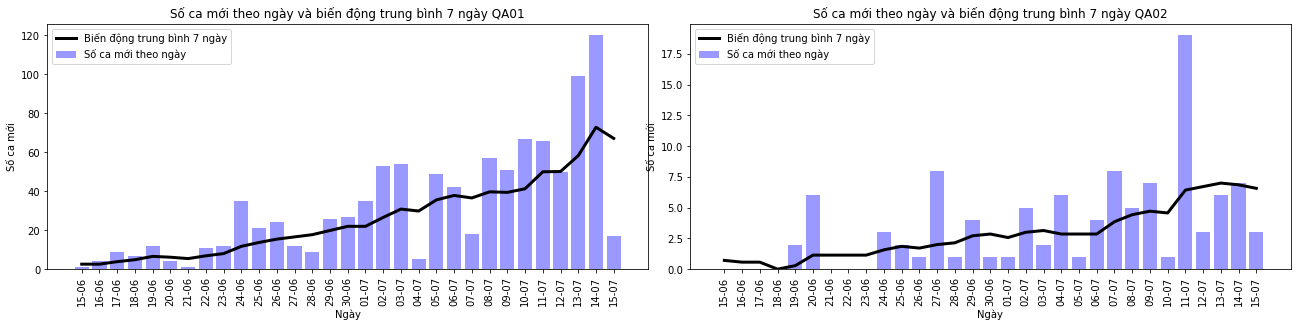

In [132]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA01', 'QA02'])

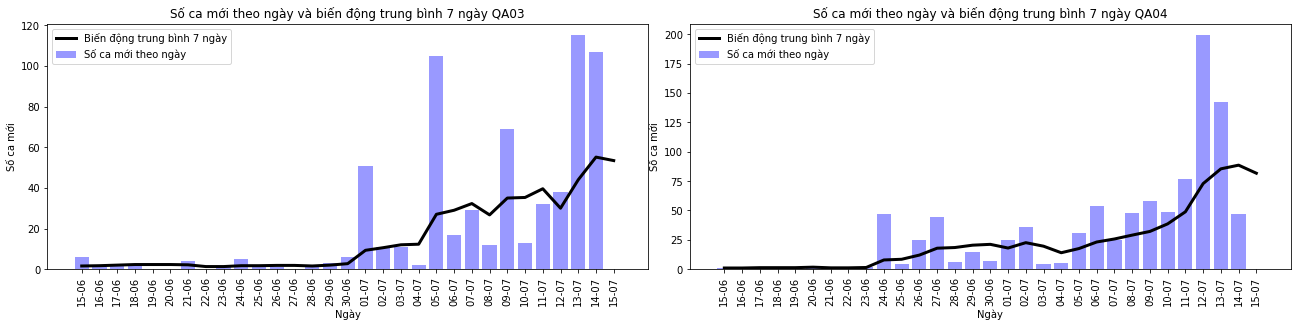

In [133]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA03', 'QA04'])

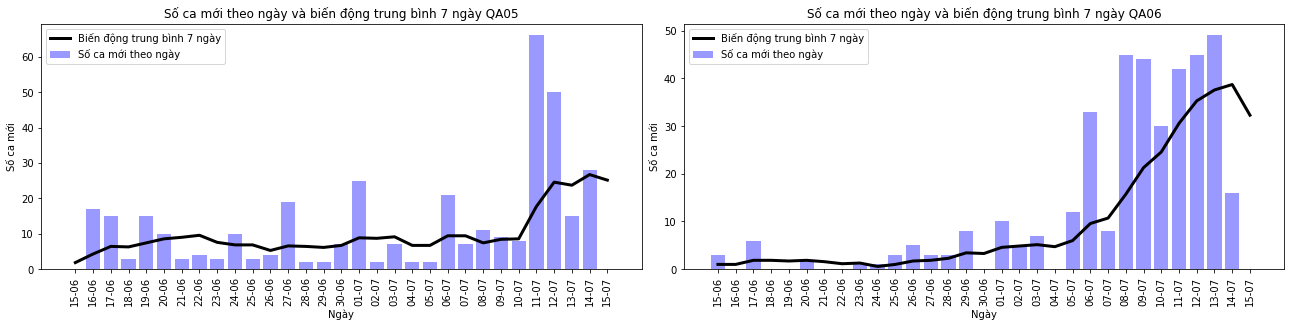

In [134]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA05', 'QA06'])

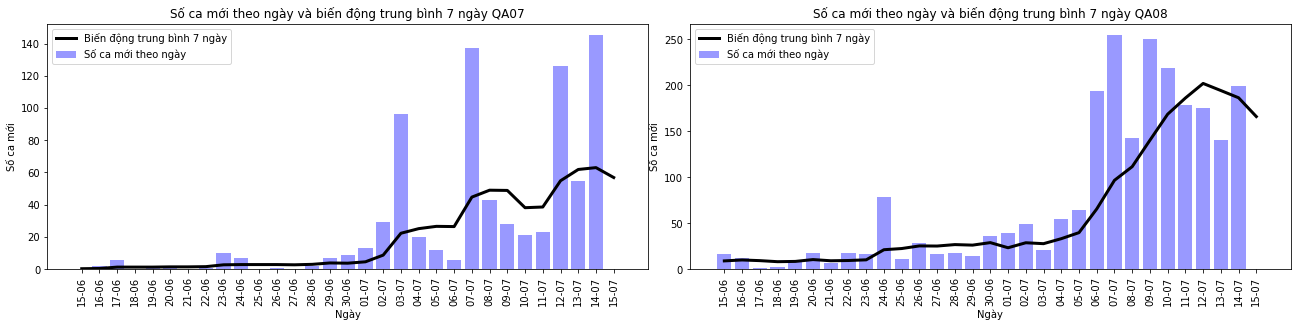

In [135]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA07', 'QA08'])

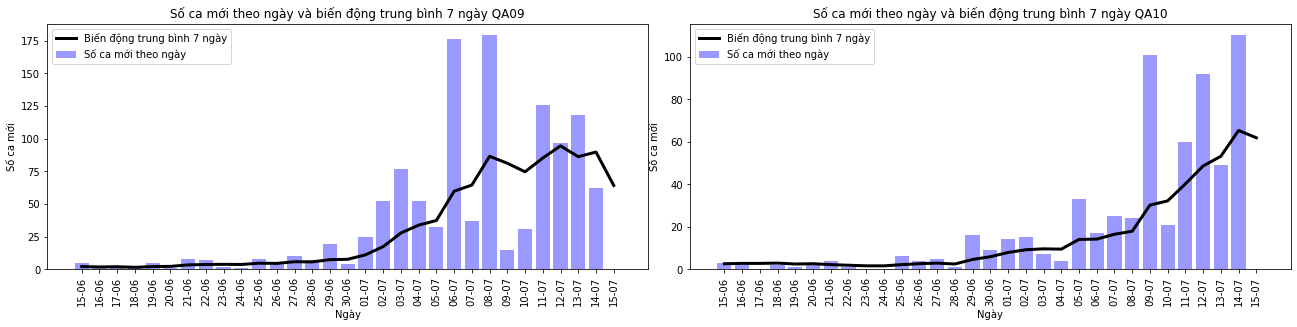

In [136]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA09', 'QA10'])

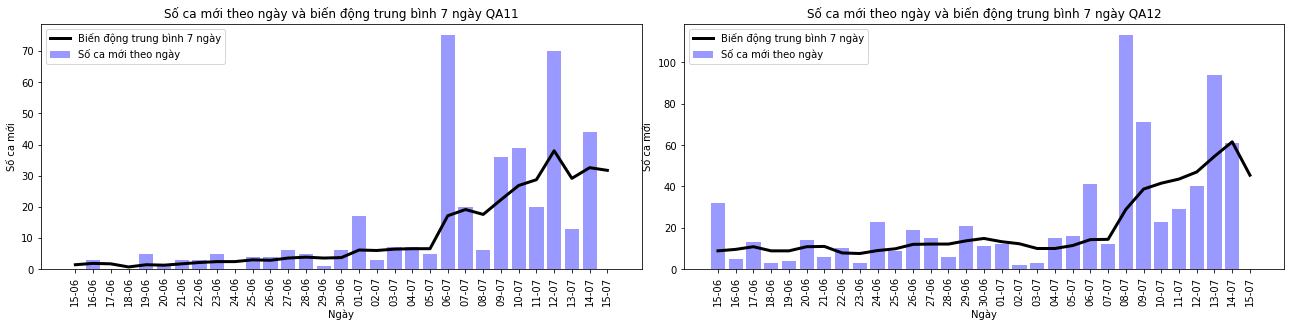

In [137]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QA11', 'QA12'])

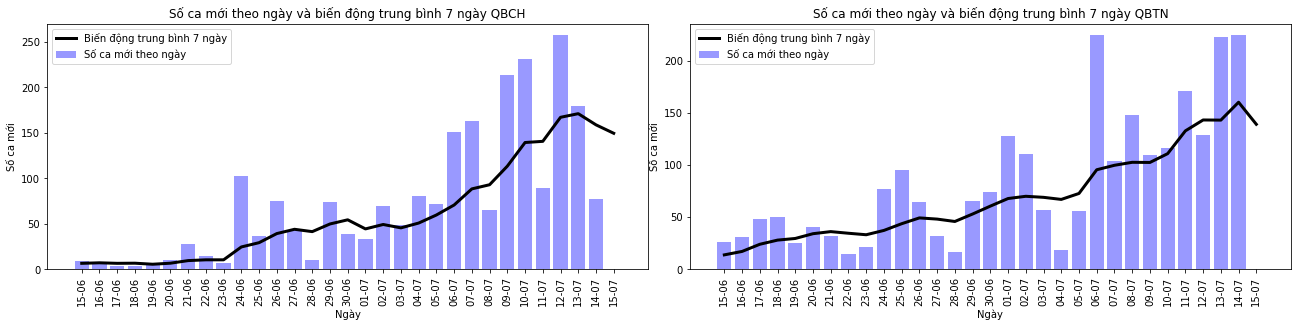

In [139]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QBCH', 'QBTN'])

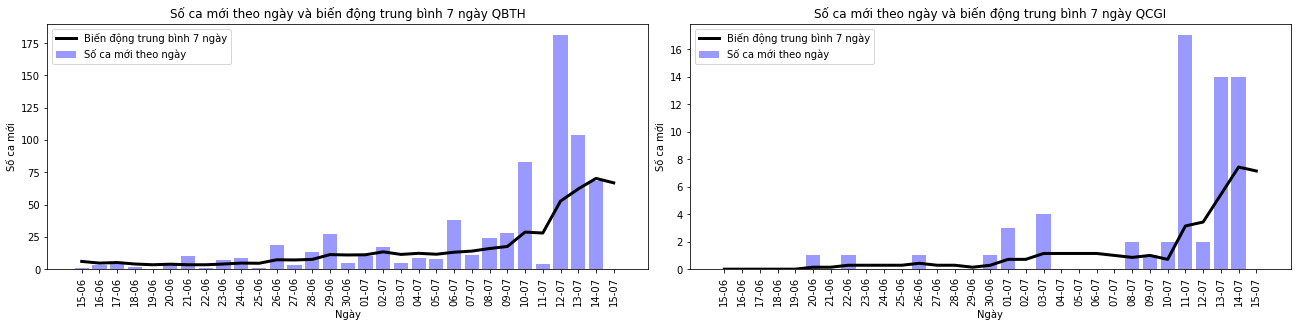

In [140]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QBTH', 'QCGI'])

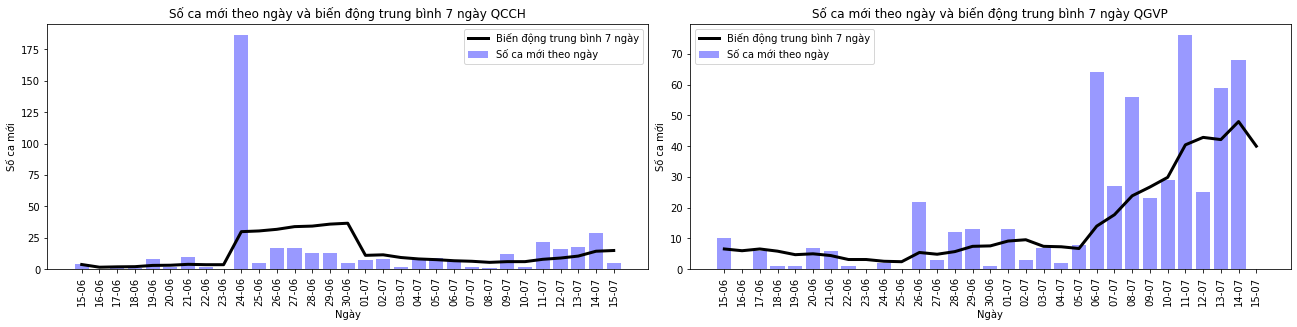

In [141]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QCCH', 'QGVP'])

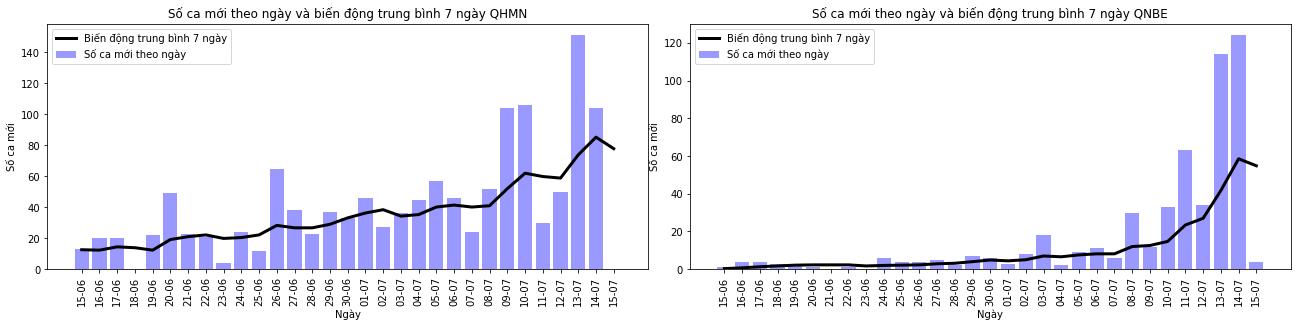

In [142]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QHMN', 'QNBE'])

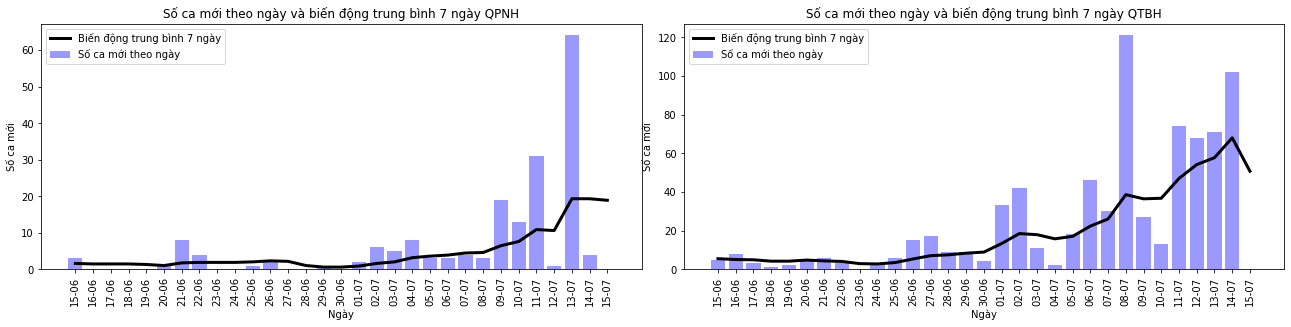

In [143]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QPNH', 'QTBH'])

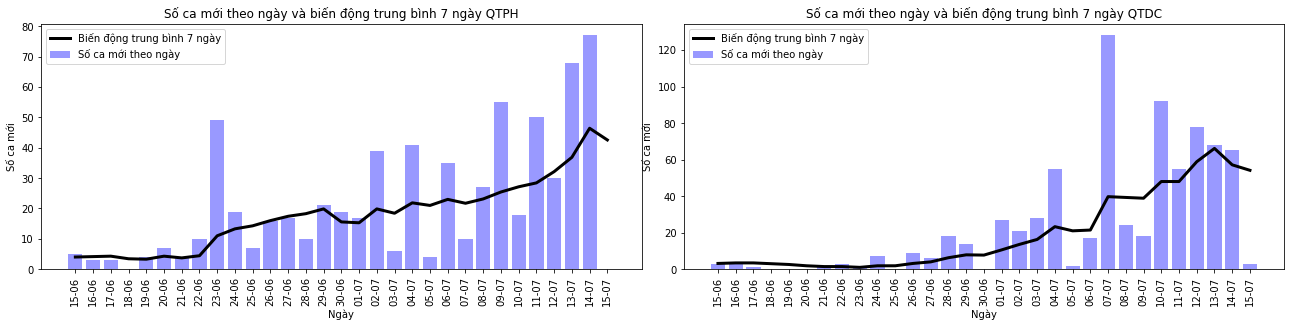

In [144]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['QTPH', 'QTDC'])

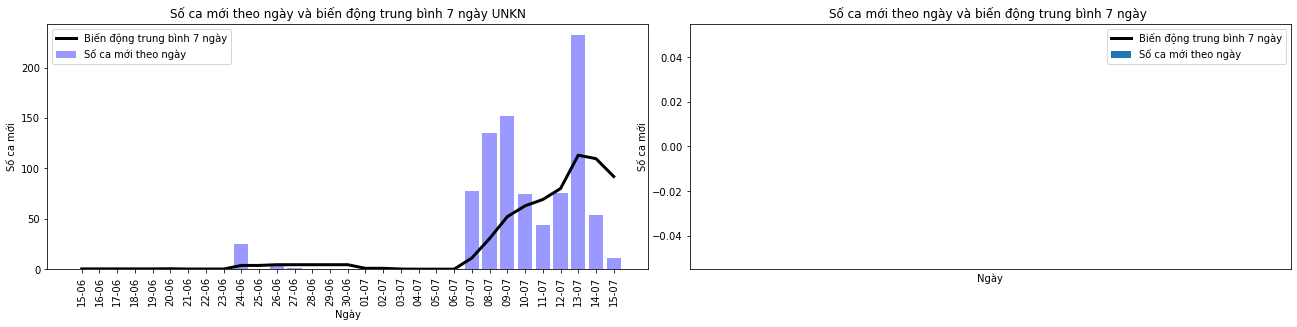

In [146]:
plot_inc_adh_rollmean(inc_adh_rollmean, ['UNKN', ''])